<a href="https://colab.research.google.com/github/EvansXGames/CMP405-Project/blob/main/League_Of_Legends_CMP405_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install databases

In [ ]:
import pandas as pd
games = pd.read_csv ("/content/games.csv")

In [ ]:
games.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


=== Classification Report (Threshold = 0.50) ===
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7624
           1       0.97      0.97      0.97      7823

    accuracy                           0.97     15447
   macro avg       0.97      0.97      0.97     15447
weighted avg       0.97      0.97      0.97     15447



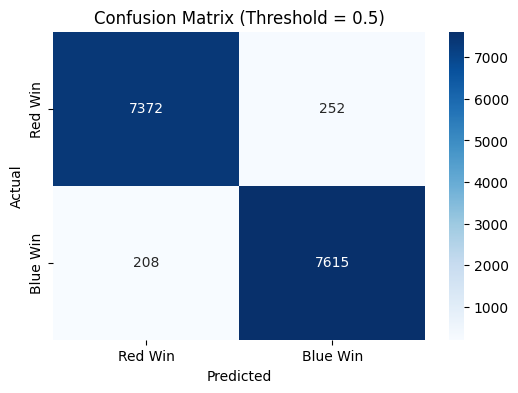

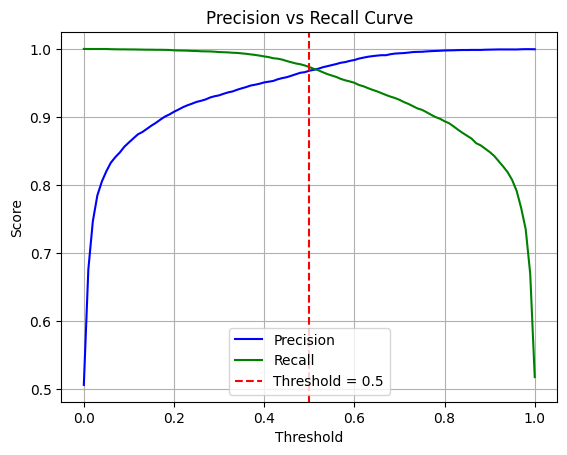

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("games.csv")
df['blueWins'] = df['winner'].apply(lambda x: 1 if x == 1 else 0)
df = df.drop(columns=[col for col in ['gameId', 'creationTime', 'seasonId', 'gameDuration', 'winner'] if col in df.columns])
df = df.dropna()

# Features and target
X = df.drop(columns=['blueWins'])
y = df['blueWins']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Adjust threshold here
threshold = 0.50  # Try different values: 0.45, 0.5, 0.55, etc.
y_pred_thresh = (y_proba >= threshold).astype(int)

# Evaluation
print("=== Classification Report (Threshold = {:.2f}) ===".format(threshold))
print(classification_report(y_test, y_pred_thresh))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_thresh)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Red Win", "Blue Win"], yticklabels=["Red Win", "Blue Win"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.show()

# Optional: Precision vs Recall plot to help find the best threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall Curve")
plt.legend()
plt.grid(True)
plt.show()
